# Machine Learning Model Experiments

## Experiment Setup

In [1]:
# Setting up execution path
import os

print(f"Current working directory: {os.path.basename(os.getcwd())}")

# Change to root directory
os.chdir("../")
print(f"Current working directory (Changed): {os.path.basename(os.getcwd())}")

Current working directory: notebooks
Current working directory (Changed): Lending-Approval-Predictor


In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# module setup
%matplotlib inline
pd.options.display.precision = 3
warnings.filterwarnings("ignore")

In [3]:
from os.path import dirname, normpath

In [4]:
from src.constants import CONFIGS, PARAMS
from src.exception import CustomException
from src.logger import logger
from src.utils.basic_utils import create_directories, read_yaml

In [5]:
# Read the configuration files
configs = read_yaml(CONFIGS).model_evaluation

# Train and test array paths
train_array_path = normpath(configs.train_array_path)
test_array_path = normpath(configs.test_array_path)

[2024-02-15 01:28:16 PM]:ProjectLogger INFO:basic_utils 43 - yaml file: conf\configs.yaml loaded successfully


In [6]:
# Load the training and test set array
train_array = np.load(train_array_path)
test_array = np.load(test_array_path)

# Split train_array into features and target
x_train, y_train = train_array[:, :-1], train_array[:, -1]
x_test, y_test = test_array[:, :-1], test_array[:, -1]

# Log the shapes
print(f"The shape of x_train: {x_train.shape}")
print(f"The shape of y_train: {y_train.shape}")

print(f"The shape of x_test: {x_test.shape}")
print(f"The shape of y_test: {y_test.shape}")

The shape of x_train: (7662, 19)
The shape of y_train: (7662,)
The shape of x_test: (1916, 19)
The shape of y_test: (1916,)


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [8]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}

In [9]:
# Read the params files
params = read_yaml(PARAMS)

[2024-02-15 01:28:18 PM]:ProjectLogger INFO:basic_utils 43 - yaml file: conf\params.yaml loaded successfully


In [10]:
# Params content
print(params.random_forest.to_dict())
print(params.decision_tree.to_dict())

{'criterion': ['gini', 'entropy', 'log_loss'], 'max_features': ['sqrt', 'log2'], 'n_estimators': [8, 16, 32, 64, 128, 256]}
{'criterion': ['gini', 'entropy', 'log_loss'], 'splitter': ['best', 'random'], 'max_features': ['sqrt', 'log2']}


In [11]:
hyper_params = {
    "Decision Tree": params.decision_tree.to_dict(),
    "Random Forest": params.random_forest.to_dict(),
}

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [13]:
from src.utils.model_utils import evaluate_classification_models, get_best_model

In [14]:
model_scores = evaluate_classification_models(
    x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, 
    models=models, params=hyper_params, binary_classification=True)

[2024-02-15 01:28:27 PM]:ProjectLogger INFO:model_utils 41 - Evaluating Decision Tree model
[2024-02-15 01:28:27 PM]:ProjectLogger INFO:model_utils 46 - Started grid search over possible hyperparameters
[2024-02-15 01:28:29 PM]:ProjectLogger INFO:model_utils 51 - Fitting Decision Tree model with best parameters found
[2024-02-15 01:28:29 PM]:ProjectLogger INFO:model_utils 56 - Performing prediction over the training and test data
[2024-02-15 01:28:29 PM]:ProjectLogger INFO:model_utils 61 - Evaluating the Decision Tree model
[2024-02-15 01:28:30 PM]:ProjectLogger INFO:model_utils 41 - Evaluating Random Forest model
[2024-02-15 01:28:30 PM]:ProjectLogger INFO:model_utils 46 - Started grid search over possible hyperparameters
[2024-02-15 01:35:39 PM]:ProjectLogger INFO:model_utils 51 - Fitting Random Forest model with best parameters found
[2024-02-15 01:35:44 PM]:ProjectLogger INFO:model_utils 56 - Performing prediction over the training and test data
[2024-02-15 01:35:44 PM]:ProjectLogg

In [15]:
model_scores

[{'model_name': 'Decision Tree',
  'model': DecisionTreeClassifier(max_features='sqrt'),
  'hyperparameters': {'criterion': 'gini',
   'max_features': 'sqrt',
   'splitter': 'best'},
  'accuracy_score_train': 1.0,
  'precision_score_train': 1.0,
  'recall_score_train': 1.0,
  'f1_score_train': 1.0,
  'accuracy_score_test': 0.9702505219206681,
  'precision_score_test': 0.9806076276664512,
  'recall_score_test': 0.9825129533678757,
  'f1_score_test': 0.9815593659010029},
 {'model_name': 'Random Forest',
  'model': RandomForestClassifier(n_estimators=128),
  'hyperparameters': {'criterion': 'gini',
   'max_features': 'sqrt',
   'n_estimators': 128},
  'accuracy_score_train': 1.0,
  'precision_score_train': 1.0,
  'recall_score_train': 1.0,
  'f1_score_train': 1.0,
  'accuracy_score_test': 0.9859081419624217,
  'precision_score_test': 0.9884095299420477,
  'recall_score_test': 0.9941709844559585,
  'f1_score_test': 0.9912818856958346}]

In [16]:
scores_df = pd.DataFrame(model_scores)
scores_df

,model_name,model,hyperparameters,accuracy_score_train,precision_score_train,recall_score_train,f1_score_train,accuracy_score_test,precision_score_test,recall_score_test,f1_score_test
0,Decision Tree,DecisionTreeClassifier(max_features='sqrt'),"{'criterion': 'gini', 'max_features': 'sqrt', ...",1.0,1.0,1.0,1.0,0.970,0.981,0.983,0.982
1,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...","{'criterion': 'gini', 'max_features': 'sqrt', ...",1.0,1.0,1.0,1.0,0.986,0.988,0.994,0.991


In [17]:
best_model = get_best_model(scores_df, evaluation_metric="f1_score_test")
best_model

{'model_name': 'Random Forest',
 'model': RandomForestClassifier(n_estimators=128),
 'hyperparameters': {'criterion': 'gini',
  'max_features': 'sqrt',
  'n_estimators': 128}}

In [18]:
rf_model = best_model["model"]
rf_model

RandomForestClassifier(n_estimators=128)

In [19]:
y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def classification_metrics(y_true, y_pred) -> dict:
    """
    Calculates the classification metrics accuracy, precision, recall, and F1 score.
    """
    accuracy =  accuracy_score(y_true, y_pred)
    precision =  precision_score(y_true, y_pred)    
    recall =  recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    classification_dict = {
        "Accuracy": round(accuracy, 3),
        "Precision": round(precision, 3),
        "Recall": round(recall, 3),
        "F1 Score": round(f1, 3)
    }
    return classification_dict

In [21]:
test_eval_metrics = classification_metrics(y_test, y_test_pred)
test_eval_metrics

{'Accuracy': 0.986, 'Precision': 0.988, 'Recall': 0.994, 'F1 Score': 0.991}

In [22]:
train_eval_metrics = classification_metrics(y_train, y_train_pred)
train_eval_metrics

{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0}

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [45]:
classes = rf_model.classes_
classes

array([0., 1.])

In [79]:
def detailed_classification_metrics(y_true, y_pred, classes: list):
    cr_dict = classification_report(y_true, y_pred, output_dict=True)
    cr_df = pd.DataFrame(cr_dict).transpose()
    cr_classes = cr_df.iloc[:len(classes)].reset_index().rename(columns={"index": "class"})
    avgs_df = cr_df.iloc[len(classes)+1:]
    accuracy = round(cr_dict["accuracy"], 3)
    return cr_classes, avgs_df, accuracy

In [115]:
cr_classes, avgs_df, acc = detailed_classification_metrics(y_test, y_test_pred, classes)


In [116]:
cr_classes

,class,precision,recall,f1-score,support
0,0.0,0.975,0.952,0.963,372.0
1,1.0,0.988,0.994,0.991,1544.0


In [117]:
avgs_df

,precision,recall,f1-score,support
macro avg,0.982,0.973,0.977,1916.0
weighted avg,0.986,0.986,0.986,1916.0


In [118]:
acc

0.986

In [113]:
def detailed_confusion_matrix(y_true, y_pred, classes: list, normalize:bool=False):
    cm = confusion_matrix(y_test, y_test_pred)
    
    cm_data = []

    # Iterate over classes and confusion matrix 
    for idx, class_name in enumerate(classes):
        TP = cm[idx][idx]
        FP = sum(cm[row][idx] for row in range(len(cm)) if row != idx)
        FN = sum(cm[idx][col] for col in range(len(cm)) if col != idx)
        TN = sum(sum(row) for j, row in enumerate(cm) if j != idx) - FP
        cm_dict = {
            "class": class_name,
            "TP": TP if normalize==False else TP/(TP+FN),
            "FP": FP if normalize==False else FP/(TN+FP),
            "FN": FN if normalize==False else FN/(TP+FN),
            "TN": TN if normalize==False else TN/(TN+FP)
        }
        cm_data.append(cm_dict)
    # Construct dataframe
    cm_df = pd.DataFrame(cm_data)
    return cm_df

In [120]:
cm_df = detailed_confusion_matrix(y_test, y_test_pred, classes, normalize=False)
cm_df

,class,TP,FP,FN,TN
0,0.0,354,9,18,1535
1,1.0,1535,18,9,354


In [121]:
cm_df_pct = detailed_confusion_matrix(y_test, y_test_pred, classes, normalize=True)
cm_df_pct

,class,TP,FP,FN,TN
0,0.0,0.952,0.006,0.048,0.994
1,1.0,0.994,0.048,0.006,0.952


In [152]:
## join dataframes

def get_classificaion_report_df(y_true, y_pred, classes: list):
    cr_df, _, _ = detailed_classification_metrics(y_true, y_pred, classes)
    cm_df = detailed_confusion_matrix(y_true, y_pred, classes, normalize=False)
    cm_df_norm = detailed_confusion_matrix(y_true, y_pred, classes, normalize=True)

    # Add "_norm" to cm_df_norm columns (except the "class" column)
    cm_df_norm.columns = ["class"] + [x+"_norm" for x in cm_df_norm.columns if x != "class"]

    # Change the "class" column to "str" type
    for df in [cr_df, cm_df, cm_df_norm]:
        df["class"] = df["class"].astype(str)
    
    # Merge dataframes
    merged_df = cr_df.merge(cm_df, on="class").merge(cm_df_norm, on="class")
    return merged_df

In [153]:
tot_df = get_classificaion_report_df(y_test, y_test_pred, classes)
tot_df

,class,precision,recall,f1-score,support,TP,FP,FN,TN,TP_norm,FP_norm,FN_norm,TN_norm
0,0.0,0.975,0.952,0.963,372.0,354,9,18,1535,0.952,0.006,0.048,0.994
1,1.0,0.988,0.994,0.991,1544.0,1535,18,9,354,0.994,0.048,0.006,0.952


In [165]:
def get_classification_report_dict(y_true, y_pred, classes: list):
    metrics = classification_metrics(y_true, y_pred)
    cr_df, avgs_df, _ = detailed_classification_metrics(y_true, y_pred, classes)
    cm_df = detailed_confusion_matrix(y_true, y_pred, classes, normalize=False)
    cm_df_norm = detailed_confusion_matrix(y_true, y_pred, classes, normalize=True)

    cm_dict = cm_df.set_index("class").transpose().to_dict()
    cm_norm_dict = cm_df_pct.set_index("class").transpose().to_dict()
    cr_dict = cr_classes.set_index("class").transpose().to_dict()
    avgs_dict = avgs_df.transpose().to_dict()

    return {
        "averages": avgs_dict,
        "classification_report": cr_dict,
        "confusion_matrix": cm_dict,
        "confusion_matrix_normalized": cm_norm_dict
    }

    

In [167]:
full_dict = get_classification_report_dict(y_test, y_test_pred, classes)
full_dict

{'averages': {'macro avg': {'precision': 0.9818080707561478,
   'recall': 0.9728919438408825,
   'f1-score': 0.9772735959091419,
   'support': 1916.0},
  'weighted avg': {'precision': 0.9858461240786294,
   'recall': 0.9859081419624217,
   'f1-score': 0.9858423410187472,
   'support': 1916.0}},
 'classification_report': {'0.0': {'precision': 0.9752066115702479,
   'recall': 0.9516129032258065,
   'f1-score': 0.963265306122449,
   'support': 372.0},
  '1.0': {'precision': 0.9884095299420477,
   'recall': 0.9941709844559585,
   'f1-score': 0.9912818856958346,
   'support': 1544.0}},
 'confusion_matrix': {0.0: {'TP': 354, 'FP': 9, 'FN': 18, 'TN': 1535},
  1.0: {'TP': 1535, 'FP': 18, 'FN': 9, 'TN': 354}},
 'confusion_matrix_normalized': {'0.0': {'TP': 0.9516129032258065,
   'FP': 0.005829015544041451,
   'FN': 0.04838709677419355,
   'TN': 0.9941709844559585},
  '1.0': {'TP': 0.9941709844559585,
   'FP': 0.04838709677419355,
   'FN': 0.005829015544041451,
   'TN': 0.9516129032258065}}}

In [158]:
cm_dict = cm_df.set_index("class").transpose().to_dict()
cm_norm_dict = cm_df_pct.set_index("class").transpose().to_dict()

In [159]:
cm_norm_dict

{'0.0': {'TP': 0.9516129032258065,
  'FP': 0.005829015544041451,
  'FN': 0.04838709677419355,
  'TN': 0.9941709844559585},
 '1.0': {'TP': 0.9941709844559585,
  'FP': 0.04838709677419355,
  'FN': 0.005829015544041451,
  'TN': 0.9516129032258065}}

In [162]:
cr_dict = cr_classes.set_index("class").transpose().to_dict()
cr_dict

{'0.0': {'precision': 0.9752066115702479,
  'recall': 0.9516129032258065,
  'f1-score': 0.963265306122449,
  'support': 372.0},
 '1.0': {'precision': 0.9884095299420477,
  'recall': 0.9941709844559585,
  'f1-score': 0.9912818856958346,
  'support': 1544.0}}

In [164]:
avgs_df.transpose().to_dict()

{'macro avg': {'precision': 0.9818080707561478,
  'recall': 0.9728919438408825,
  'f1-score': 0.9772735959091419,
  'support': 1916.0},
 'weighted avg': {'precision': 0.9858461240786294,
  'recall': 0.9859081419624217,
  'f1-score': 0.9858423410187472,
  'support': 1916.0}}

In [154]:
class_level_results = tot_df.set_index("class").transpose().to_dict()
class_level_results

{'0.0': {'precision': 0.9752066115702479,
  'recall': 0.9516129032258065,
  'f1-score': 0.963265306122449,
  'support': 372.0,
  'TP': 354.0,
  'FP': 9.0,
  'FN': 18.0,
  'TN': 1535.0,
  'TP_norm': 0.9516129032258065,
  'FP_norm': 0.005829015544041451,
  'FN_norm': 0.04838709677419355,
  'TN_norm': 0.9941709844559585},
 '1.0': {'precision': 0.9884095299420477,
  'recall': 0.9941709844559585,
  'f1-score': 0.9912818856958346,
  'support': 1544.0,
  'TP': 1535.0,
  'FP': 18.0,
  'FN': 9.0,
  'TN': 354.0,
  'TP_norm': 0.9941709844559585,
  'FP_norm': 0.04838709677419355,
  'FN_norm': 0.005829015544041451,
  'TN_norm': 0.9516129032258065}}

In [141]:
avgs_dict = avgs_df.transpose().to_dict()
avgs_dict

{'macro avg': {'precision': 0.9818080707561478,
  'recall': 0.9728919438408825,
  'f1-score': 0.9772735959091419,
  'support': 1916.0},
 'weighted avg': {'precision': 0.9858461240786294,
  'recall': 0.9859081419624217,
  'f1-score': 0.9858423410187472,
  'support': 1916.0}}

In [62]:
cm_data = []
for i, class_name in enumerate(classes):
    TP = cm[i][i]
    FP = sum(cm[r][i] for r in range(len(cm)) if r != i)
    FN = sum(cm[i][c] for c in range(len(cm)) if c != i)
    TN = sum(sum(row) for j, row in enumerate(cm) if j != i) - FP
    cm_dict = {
        "class": class_name,
        "TP": TP,
        "FP": FP,
        "FN": FN,
        "TN": TN
    }
    cm_data.append(cm_dict)

# View confusion matrix
cm_data

[{'class': 0.0, 'TP': 354, 'FP': 9, 'FN': 18, 'TN': 1535},
 {'class': 1.0, 'TP': 1535, 'FP': 18, 'FN': 9, 'TN': 354}]

In [63]:
cm_df = pd.DataFrame(cm_data)
cm_df

,class,TP,FP,FN,TN
0,0.0,354,9,18,1535
1,1.0,1535,18,9,354


In [ ]:
def detailed_confusion_matrix(y_true, y_pred, classes: list):
    cm_data = []

    # Iterate over classes and confusion matrix 
    for idx, class_name in enumerate(classes):
        TP = cm[idx][idx]
        FP = sum(cm[r][idx] for row in range(len(cm)) if row != idx)
        FN = sum(cm[idx][c] for col in range(len(cm)) if col != idx)
        TN = sum(sum(row) for j, row in enumerate(cm) if j != idx) - FP
        cm_dict = {
            "class": class_name,
            "TP": TP,
            "FP": FP,
            "FN": FN,
            "TN": TN
        }
        cm_data.append(cm_dict)
    # Construct dataframe
    cm_df = pd.DataFrame(cm_data)
    return cm_df

In [229]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, class_names: list):
  """
  Plots the confusion matrix for evaluating classification model
  """

  # calculate confusion matrix values
  cm = confusion_matrix(y_true, y_pred)
  cm_pct = confusion_matrix(y_true, y_pred, normalize="true")

  # confusion matrix display objects
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=class_names)
  disp_pct = ConfusionMatrixDisplay(confusion_matrix=cm_pct,
                                  display_labels=class_names)

  # create the figure object and axis
  fig = plt.figure(figsize=(20, 15))
  ax1 = fig.add_subplot(1, 2, 1)
  ax2 = fig.add_subplot(1, 2, 2)

  # plot confusion matrix on the axis
  disp.plot(ax=ax1, cmap="Blues", xticks_rotation='vertical', colorbar=False)
  disp_pct.plot(ax=ax2, cmap="Blues", xticks_rotation="vertical", colorbar=False, values_format='.2%')

  # plot customization
  ax1.set_title("Confusion Matrix", fontdict={'weight':'bold'})
  ax2.set_title("Confusion Matrix (Percentages)", fontdict={'weight':'bold'})

  # show plot
  plt.show()

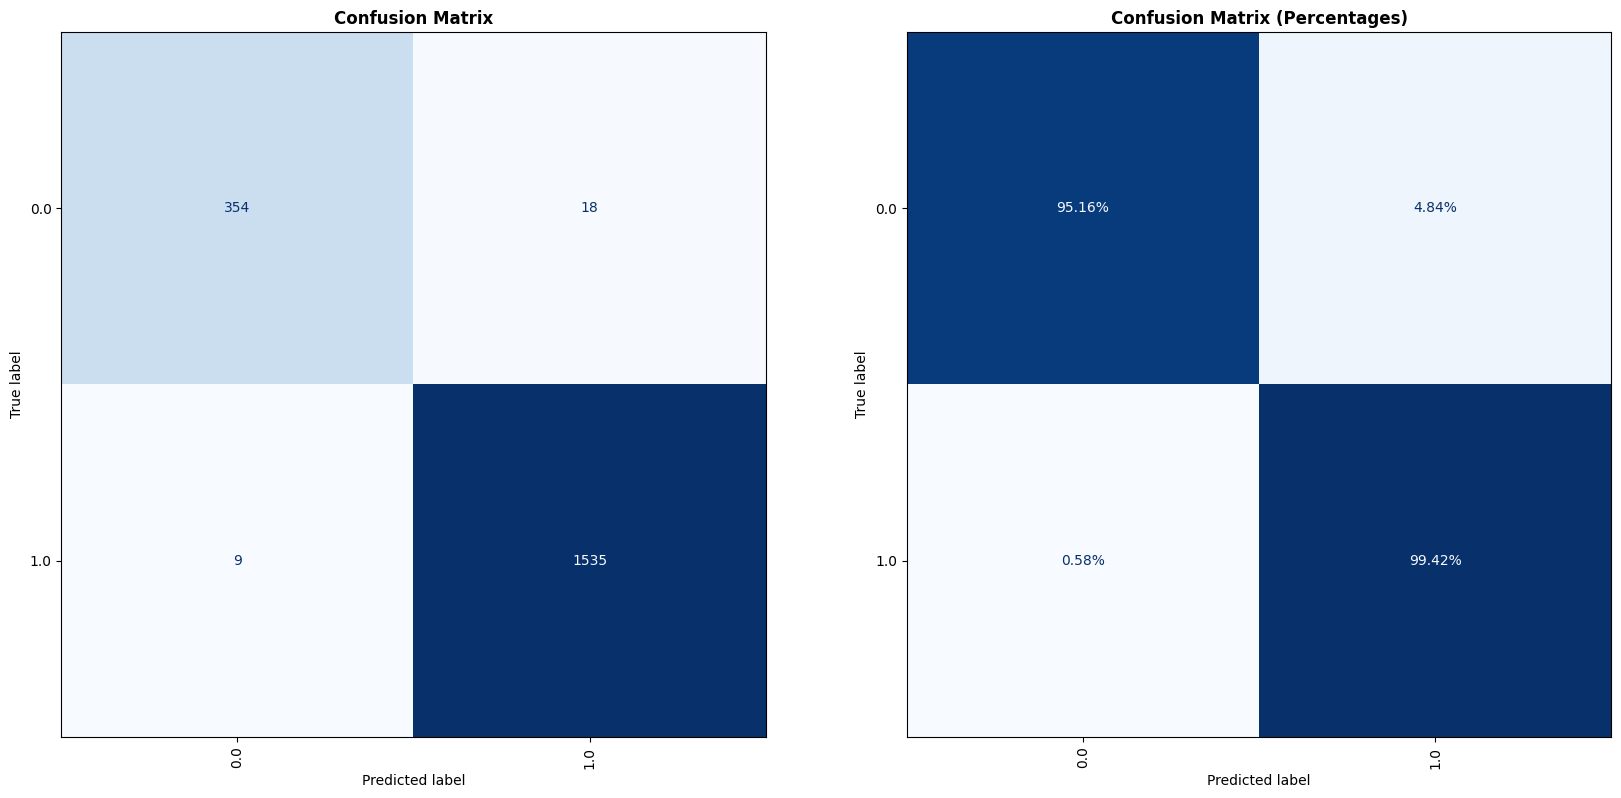

In [230]:
plot_confusion_matrix(y_test, y_test_pred, class_names=classes)

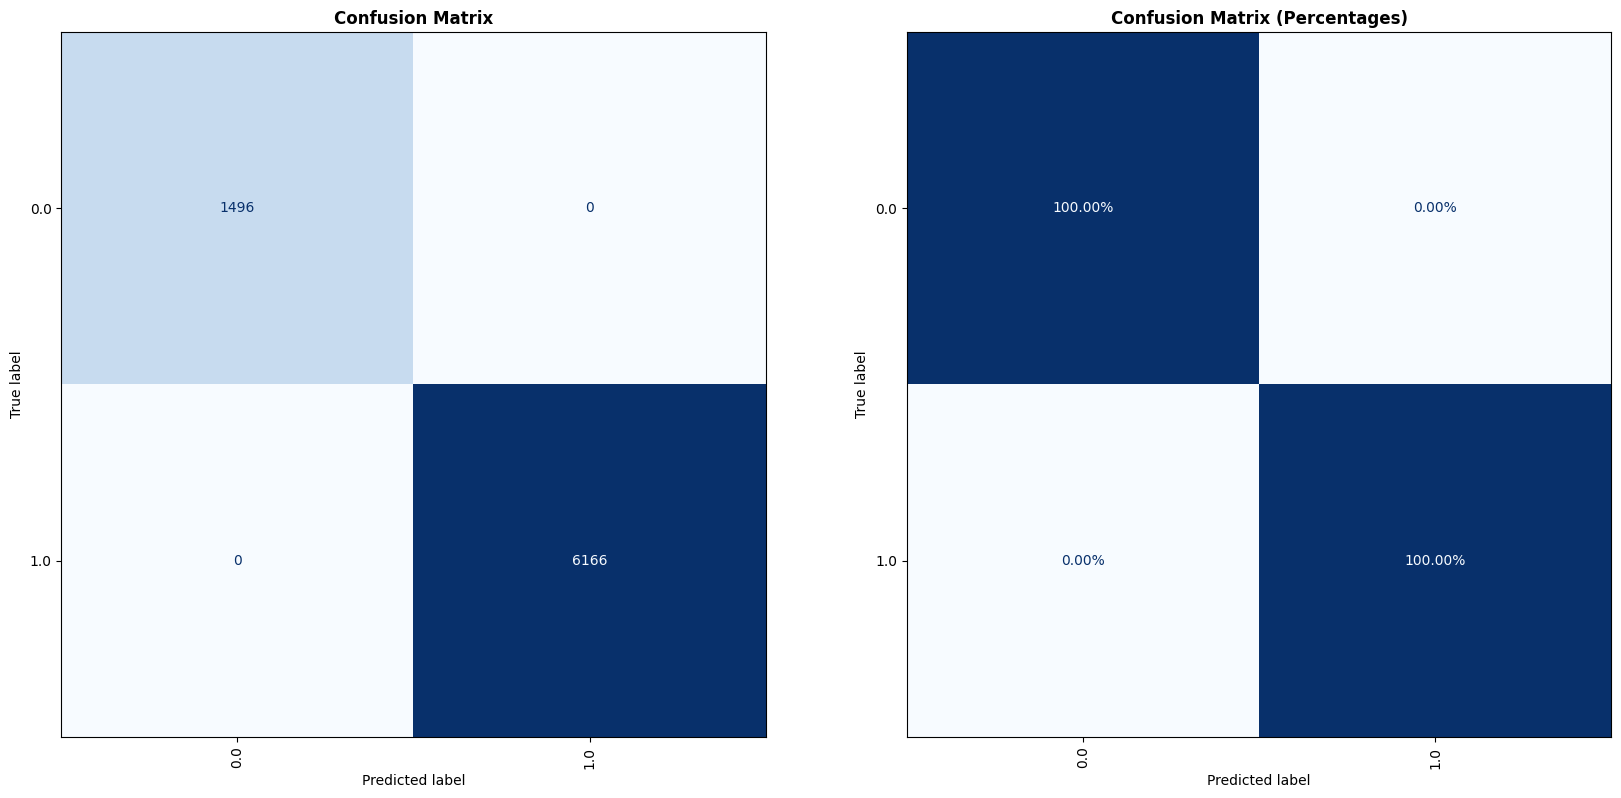

In [231]:
plot_confusion_matrix(y_train, y_train_pred, class_names=classes)

In [ ]:
from matplotlib.colors import rgb2hex

def text_color(cmap_name: str, frac: float) -> str:
    cmap = plt.get_cmap(cmap_name)
    colors = [rgb2hex(cmap(i)) for i in range(cmap.N)]
    target_idx = int(frac * len(colors))
    return colors[target_idx]

In [225]:
from matplotlib.colors import rgb2hex
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def visualize_confusion_matrix(y_true, y_pred, classes: list, fig_size: tuple=(8, 6), color_bar: bool=False, title: str="Confusion Matrix"):
    # Calculate confusion matrix values & normalized values
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = confusion_matrix(y_true, y_pred, normalize="true")

    # Calculate the confusion matrix in percentages of total (for text color)
    cm_pct = cm / cm.sum()

    # Confusion matrix display objects
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                  display_labels=classes)

    # Create the figure object and axis
    fig = plt.figure(figsize=fig_size)
    ax = fig.add_subplot()

    # Plot confusion matrix on the axis
    disp.plot(ax=ax, cmap="Blues", colorbar=color_bar)

    # Function to dynamically generate text colors
    def text_color(cmap_name: str, frac: float) -> str:
        cmap = plt.get_cmap(cmap_name)
        colors = [rgb2hex(cmap(i)) for i in range(cmap.N)]
        target_idx = int(frac * len(colors))
        return colors[target_idx]
    
    # Annotate confusion matrix with percentages
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            
            # Fetch percentage value & appropriate text color
            value = cm_norm[i, j]
            hex_color = text_color("Blues_r", cm_pct[i, j])

            # Add text in the plot
            ax.text(j, i+0.1, '{:.2%}'.format(value),
                    ha='center', va='center', color=hex_color)

    # Plot customization
    ax.set_title(title, fontdict={'weight':'bold'})
    
    # Show plot
    plt.show()

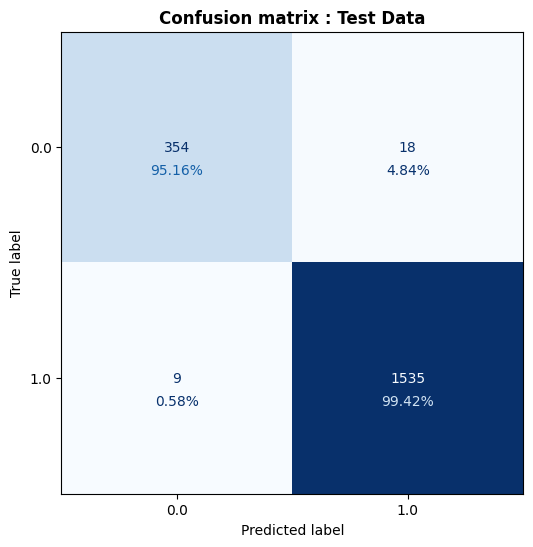

In [226]:
visualize_confusion_matrix(y_test, y_test_pred, classes, title="Confusion matrix : Test Data")

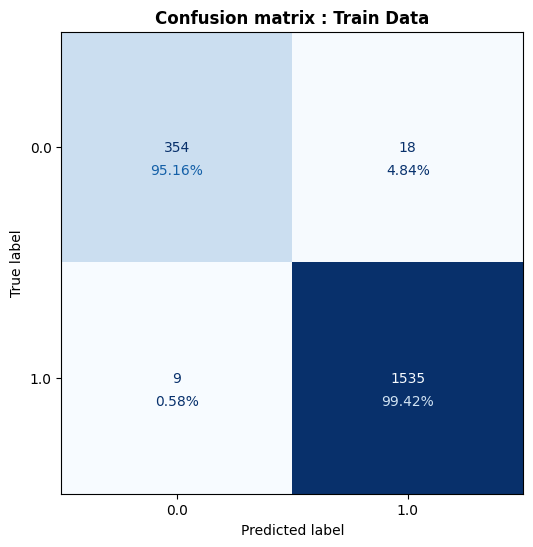

In [227]:
visualize_confusion_matrix(y_test, y_test_pred, classes, title="Confusion matrix : Train Data")